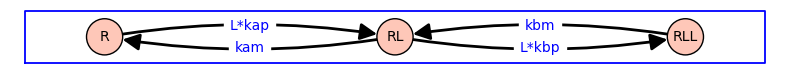

In [1]:
var('R RL RLL L kap kam kbp kbm')
G = DiGraph({R: {RL:kap*L}, RL: {R:kam, RLL:kbp*L}, RLL: {RL:kbm}})
pos = {R: (0, 0), RL: (2, 0), RLL: (4, 0)}
G.plot(figsize=8,edge_labels=True,pos=pos,graph_border=True,vertex_size=1000)

In [2]:
z_R = kam*kbm; z_RL = kap*L*kbm; z_RLL = kap*L*kbp*L; z_T = z_R+z_RL+z_RLL
R = z_R/z_T; RL = z_RL/z_T; RLL = z_RLL/z_T

print('R   =',R,'','RL  =',RL,'','RLL =',RLL)

R   = kam*kbm/(L^2*kap*kbp + L*kap*kbm + kam*kbm)  RL  = L*kap*kbm/(L^2*kap*kbp + L*kap*kbm + kam*kbm)  RLL = L^2*kap*kbp/(L^2*kap*kbp + L*kap*kbm + kam*kbm)


R   = 1/(10*L^2 + L + 1)  RL  = L/(10*L^2 + L + 1)  RLL = 10*L^2/(10*L^2 + L + 1)


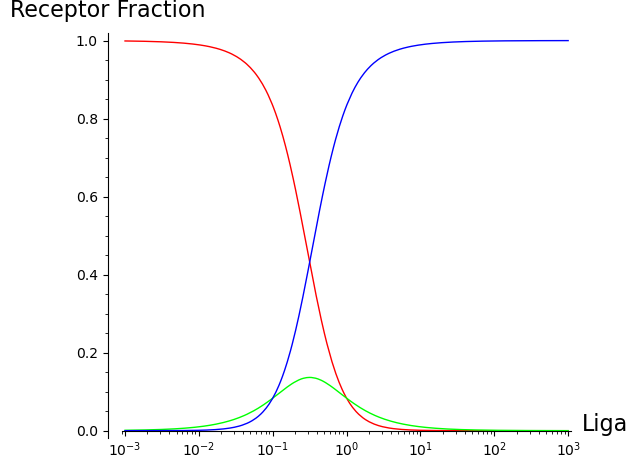

In [3]:
params = {kap:1,kam:1,kbp:10,kbm:1}

R = R.subs(params); RL = RL.subs(params); RLL = RLL.subs(params)
print('R   =',R,'','RL  =',RL,'','RLL =',RLL)

Lmin=0.001; Lmax=1000;

pR = plot_semilogx(R, (L, Lmin, Lmax), rgbcolor=(1,0,0))
pRL = plot_semilogx(RL, (L, Lmin, Lmax), rgbcolor=(0,1,0))
pRLL = plot_semilogx(RLL,(L, Lmin, Lmax), rgbcolor=(0,0,1),axes_labels=['Ligand', 'Receptor Fraction'])

show(pR+pRL+pRLL)


In [4]:
var('ka kb')
z_R = 1; z_RL = ka*L; z_RLL = ka*L*kb*L; z_T = z_R+z_RL+z_RLL
R = z_R/z_T; RL = z_RL/z_T; RLL = z_RLL/z_T

print('R =',R)
print('RL =',RL)
print('RLL =',RLL)

R = 1/(L^2*ka*kb + L*ka + 1)
RL = L*ka/(L^2*ka*kb + L*ka + 1)
RLL = L^2*ka*kb/(L^2*ka*kb + L*ka + 1)


R = 1/(L^2 + L + 1)
RL = L/(L^2 + L + 1)
RLL = L^2/(L^2 + L + 1)


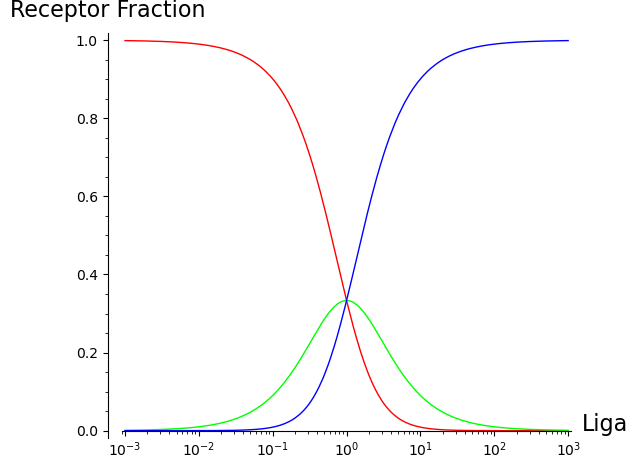

In [5]:
R = R.subs(ka=1,kb=1)
RL = RL.subs(ka=1,kb=1)
RLL = RLL.subs(ka=1,kb=1)

print('R =',R)
print('RL =',RL)
print('RLL =',RLL)

Lmin=0.001; Lmax=1000;

pR = plot_semilogx(R, (L, Lmin, Lmax), rgbcolor=(1,0,0))
pRL = plot_semilogx(RL, (L, Lmin, Lmax), rgbcolor=(0,1,0))
pRLL = plot_semilogx(RLL,(L, Lmin, Lmax), rgbcolor=(0,0,1),axes_labels=['Ligand', 'Receptor Fraction'])

show(pR+pRL+pRLL)

In [6]:
A = G.weighted_adjacency_matrix()
print(A)

[    0     0   kbm]
[    0     0 L*kap]
[L*kbp   kam     0]


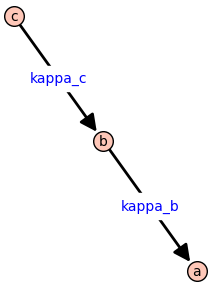

In [7]:
var('a b c kappa_b kappa_c')
T = DiGraph([[a,b,c],[(b,a),(c,b)]])
T.set_edge_label(b,a,kappa_b)
T.set_edge_label(c,b,kappa_c)
T.plot(figsize=4,edge_labels=True)

In [8]:
B = T.weighted_adjacency_matrix()
print(B)
print(B**2)
print(B**3)

[      0       0       0]
[kappa_b       0       0]
[      0 kappa_c       0]
[              0               0               0]
[              0               0               0]
[kappa_b*kappa_c               0               0]
[0 0 0]
[0 0 0]
[0 0 0]


In [9]:
print(B)
print(B**2)
print(B**3)

[      0       0       0]
[kappa_b       0       0]
[      0 kappa_c       0]
[              0               0               0]
[              0               0               0]
[kappa_b*kappa_c               0               0]
[0 0 0]
[0 0 0]
[0 0 0]


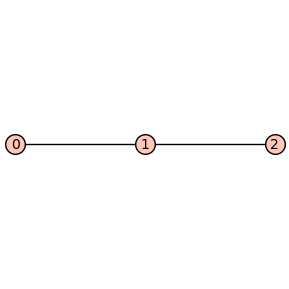

In [10]:
G=graphs.PathGraph(3)
G.show(figsize=4)

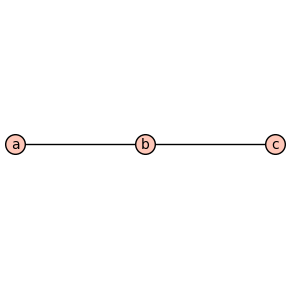

In [11]:
G.relabel(dict({0: 'a', 1: 'b', 2: 'c'}))
G.show(figsize=4)

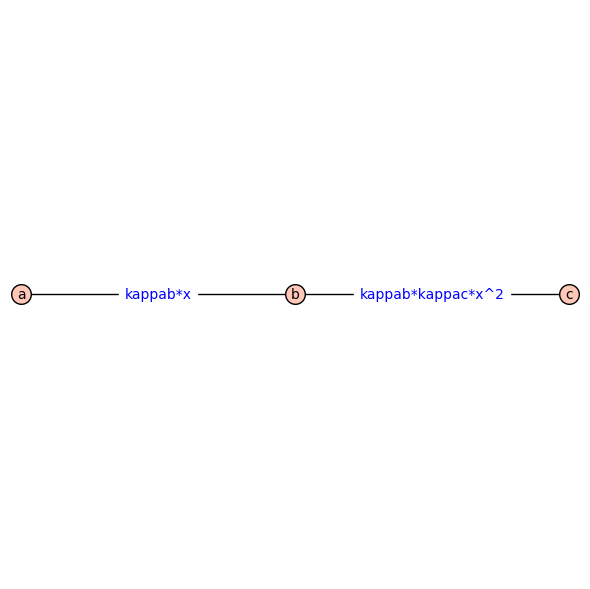

kappab*kappac*x^2

kappab*kappac*x^2

kappab*kappac*x^2


In [12]:
kappab = var("kappab", latex_name=r"\kappa_b")
kappac = var("kappac", latex_name=r"\kappa_c")
x = var("x", latex_name=r"x")
G.set_edge_label('a','b',kappab*x)
G.set_edge_label('b','c',kappab*kappac*x^2)
G.show(edge_labels=True,figsize=8)
f=kappab*kappac*x^2
f.show()
show(f)
print(f)

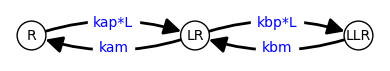

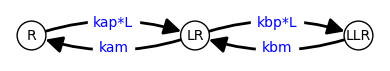

In [13]:
G=graphs.PathGraph(3).to_directed()
G.relabel({0:'R',1:'LR',2:'LLR'})
G.set_edge_label('R','LR','kap*L')
G.set_edge_label('LR','R','kam')
G.set_edge_label('LR','LLR','kbp*L')
G.set_edge_label('LLR','LR','kbm')
G.show(edge_labels=True,figsize=4,talk=True)
G.plot(edge_labels=True,figsize=4,talk=True)